<a href="https://colab.research.google.com/github/saivigneshmn/support-ticket/blob/main/rough/Sentiment%20Analysis/2_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "openai==1.57.4"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.3/390.3 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.59.6
    Uninstalling openai-1.59.6:
      Successfully uninstalled openai-1.59.6


In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 2.6 MB/s eta 0:00:00


In [ ]:
GROQ_API_KEY="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"


In [ ]:
# Step 2: Import necessary libraries
import os
from groq import Groq

# Step 3: Set your API key securely
# You can either hardcode it (not recommended) or prompt for it
api_key = input("Please enter your Groq API key: ")
client = Groq(api_key=api_key)

# Step 4: Example usage of the Groq client for chat completion
try:
    chat_completion = client.chat.completions.create(
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": "What is the capital of France?"}
        ],
        model="llama-3.3-70b-versatile"  # Specify the model you want to use
    )

    # Print the response content
    print(chat_completion.choices[0].message.content)

except Exception as e:
    print(f"An error occurred: {e}")


Please enter your Groq API key: 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
The capital of France is Paris.


In [ ]:
from groq import Groq
import os

os.environ['GROQ_API_KEY'] = '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'
client = Groq(api_key=os.getenv('GROQ_API_KEY'))

In [ ]:
import pandas as pd

In [ ]:
import json
from groq import Groq

def get_sentiment(title, chat_history):
    client = Groq(api_key="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")

    response = client.chat.completions.create(
        model="llama3-70b-8192",
        messages=[
            {"role": "system", "content": """

You are a Sentiment Analysis Assistant. Your task is to analyze customer-agent interactions and classify the sentiment based on the interaction's context and tone.

### Sentiment Categories:
1. **Positive**: The customer is happy, grateful, or expresses satisfaction after their issue is resolved.
2. **Neutral**: A routine conversation with no strong emotions. The customer neither praises nor complains.
3. **Negative**: The customer expresses dissatisfaction with the resolution, the service, or policies.
4. **Frustrated**: The customer is angry, repeatedly complains, escalates the issue, or shows signs of disappointment.

### Guidelines for Classification:
- If the customer expresses gratitude or indicates that the resolution was helpful, classify it as **Positive**.
- If the interaction lacks any emotional tone and seems transactional, classify it as **Neutral**.
- If the customer disagrees with a resolution, expresses disappointment, or shows dissatisfaction without escalating, classify it as **Negative**.
- If the customer repeatedly expresses dissatisfaction, escalates the issue, or demonstrates strong negative emotions, classify it as **Frustrated**.

### JSON Output:
Provide the response in the following format:
{
  "thought": "Explain the reasoning behind the classification.",
  "sentiment": "positive/neutral/negative/frustrated"
}

### Examples:
1. **Positive Example**:
    - Title: "Order status inquiry"
    - Chat History:
        Agent: Your order has been shipped.
        Customer: Wonderful, thank you!
    - Sentiment: Positive (the customer is satisfied with the update).

2. **Neutral Example**:
    - Title: "Refund time"
    - Chat History:
        Customer: How long will my refund take?
        Agent: Refunds typically take 3-5 days.
        Customer: Okay, thanks.
    - Sentiment: Neutral (transactional, no emotion expressed).

3. **Negative Example**:
    - Title: "Return fee dispute"
    - Chat History:
        Customer: Why do I need to pay a return fee? This is unfair.
        Agent: The return window has expired, so the fee applies.
        Customer: That's ridiculous.
    - Sentiment: Negative (the customer is unhappy with the policy but not escalating).

4. **Frustrated Example**:
    - Title: "Repeated delivery delays"
    - Chat History:
        Customer: This is the third delay! Why can’t you fix this?
        Agent: I’ll escalate this immediately.
        Customer: I’m done with your service.
    - Sentiment: Frustrated (escalation and repeated complaints).

You are an Support Agent. You have to decide on sentiment of the given ticket for which you are given:
    1. Title
    2. Chat History
    and run the fucntion 'save_sentiment' for same.
You are a Support Agent analyzing sentiment. Provide a JSON response.

Classify sentiment as: neutral, positive, negative, or frustrated.

Output JSON format:
{
  "thought": "Reasoning for sentiment",
  "sentiment": "sentiment_type"
}
Example:
1.
...
Agent: Thank you, John. Let me check the status of your order for you. Can you please hold for a moment while I check?
Customer: Yes, I can hold.
[After a brief hold]
Agent: Thank you for holding, John. I have checked the status of your order, and I can confirm that it has been processed and shipped. You should be receiving your sunglasses in the next two to three business days.
Customer: That's great news, Rachel! Thank you for confirming the status of my order.
...
For this the 'sentiment' should be 'positive', as the order has been shipped and the user is happy about it.

2.
...
Customer: Yes, actually, I was wondering if you could give me an estimated delivery date for my order.
Agent: I'd be happy to help with that. Let me check the shipping details for your order.
(Customer is put on hold for a few minutes)
Agent: Thank you for waiting, sir. I have checked the shipping details for your order, and it looks like your Power Bank will be delivered in three business days. Is there anything else I can help you with?
Customer: No, that's all for now. Thank you for your help, Sarah.
...
For this the 'sentiment' should be 'positive', as the Agent was able to handle the request properly and user is happy to know that order will be delivered soon.

3.
...
Agent: Thank you for waiting, I have checked your order details. I see that we have received the sweatshirt back, and it's currently being inspected. Once the inspection is complete, we'll process your refund. However, I must inform you that we charge a return check fee of $10 for all returned items. This fee is to cover the cost of inspecting and processing the returned item. Is there anything else I can assist you with?
Customer: I wasn't aware of the return check fee. Can you explain it to me in detail?
Agent: Sure. The return check fee is a charge that we apply to all returned items. This fee covers the cost of inspecting and processing the returned item. We need to inspect the item to ensure that it's in good condition and meets our return policy guidelines. Once the inspection is complete, we'll process your refund minus the return check fee.
Customer: I see. Thank you for explaining it to me. Can you tell me how long it will take to process my refund?
Agent: Sure, it usually takes 3-5 business days to process a refund. However, it may take longer depending on your bank's processing time. Once the refund is processed, you'll receive an email notification with the details.
Customer: Alright, I understand. Can you please process the refund now?
...

For this the 'sentiment' should be 'neutral', as customer did find it surprising to know that there will be check fee involved, but not 'negative' as the customer is not unhappy or angry with it.

4.
...
Customer: I'm not able to fit the shorts properly. It's too tight.
Agent: I see. In that case, let's try a few things. Can you please check if you're wearing the right size?
Customer: Yes, I'm wearing the right size.
Agent: Okay, let's try to loosen the shorts a bit. Can you please check if the drawstring is tight? If it is, please loosen it a bit.
Customer: Yes, the drawstring is tight. Let me loosen it.
Agent: Great, now try to fit the shorts. Is it better now?
Customer: Yes, it's much better now. Thank you for your help.
...
For this the 'sentiment' should be 'neutral', as customer did face an issue, but not 'negative' as the agent was able to solve it.

5.
...
Agent: Thank you for waiting, John. We have the same vacuum cleaner model available for exchange. You can either return the defective product, and we will send you a new one, or you can keep the defective product and receive a partial refund. Which option would you prefer?
Customer: I would like to return the defective product and receive a new one, please.
Agent: Alright, John. I will send you a return label via email, which you can use to return the defective product. Once we receive the product, we will send you a new one. Please check your email for the return label and instructions. Is there anything else I can assist you with?
Customer: No, that's all. Thank you for your help, Alex.
...
For this the 'sentiment' should be 'neutral', as customer did face an issue, but not 'negative' the customer is ok with getting a replacement.

6.
...
Agent: Thank you. Let me check the details of your order. Okay, I see that the return window for this order has expired. However, we do have a return policy that allows customers to return items within 30 days from the date of purchase. Since your return is outside of this window, we will have to charge a return fee of $5. Is that okay with you?
Customer: What? That's ridiculous! Why should I pay a fee for returning an item that doesn't fit me?
Agent: I understand your frustration, but our return policy clearly states that returns outside of the 30-day window will be subject to a return fee. This is to cover the cost of processing the return and restocking the item.
Customer: I don't care about your policy. This is unacceptable. I want to speak to your supervisor.
Agent: I'm sorry to hear that you're unhappy with our policy. However, I'm a junior agent and I'm authorized to handle customer inquiries independently. I'll do my best to assist you. Is there anything else I can do to help you with the return?
Customer: No, I just want to return the shorts without paying any fees.
Agent: I understand. Let me check if there's anything I can do to waive the return fee for you. Can you please hold for a moment?
Customer: Okay.
(Agent puts the customer on hold for a few minutes)
Agent: Thank you for holding. I'm sorry, but I'm not authorized to waive the return fee. However, if you're willing to exchange the shorts for a different size or color, we can waive the return fee and cover the cost of shipping the new item to you. Would you like to do that?
Customer: No, I don't want to exchange the shorts. I just want to return them and get my money back.
Agent: I understand. I'm sorry, but we're unable to waive the return fee in this case. If you have any other questions or concerns, please feel free to reach out to us. Is there anything else I can assist you with?
Customer: No, that's all. This is really disappointing.
...
For this the 'sentiment' should be 'negative', but not 'frustrated' because as an online aggregator we have a fixed policy and customers should read that policy before buying. For us this doesn't come under our purview to return after 30 days and we still tried to provide exchange, whoch customer rejected.

    """},
            {"role": "user", "content": f"Analyze sentiment for Title: '{title}' and Chat History: '{chat_history}'"}
        ],
        response_format={"type": "json_object"}
    )

    try:
        result = json.loads(response.choices[0].message.content)
        print(result.get('thought', 'No thought provided'))
        return result.get('sentiment', 'neutral')
    except Exception as e:
        print(f"Error parsing response: {e}")
        return 'neutral'

# Sample usage with pandas
import pandas as pd

try:
    df = pd.read_parquet('train-00000-of-00001-a5a7c6e4bb30b016.parquet')
    print("Parquet file loaded successfully.")
except Exception as e:
    print(f"Error loading parquet file: {e}")


Parquet file loaded successfully.


In [ ]:
df.head()

,issue_area,issue_category,issue_sub_category,issue_category_sub_category,customer_sentiment,product_category,product_sub_category,issue_complexity,agent_experience_level,agent_experience_level_desc,conversation
0,Login and Account,Mobile Number and Email Verification,Verification requirement for mobile number or ...,Mobile Number and Email Verification -> Verifi...,neutral,Appliances,Oven Toaster Grills (OTG),medium,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox Customer...
1,Cancellations and returns,Pickup and Shipping,Reasons for being asked to ship the item,Pickup and Shipping -> Reasons for being asked...,neutral,Electronics,Computer Monitor,less,junior,"handles customer inquiries independently, poss...",Agent: Thank you for calling BrownBox customer...
2,Cancellations and returns,Replacement and Return Process,Inability to click the 'Cancel' button,Replacement and Return Process -> Inability to...,neutral,Appliances,Juicer/Mixer/Grinder,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for calling BrownBox Customer...
3,Login and Account,Login Issues and Error Messages,Error message regarding exceeded attempts to e...,Login Issues and Error Messages -> Error messa...,neutral,Appliances,Water Purifier,less,inexperienced,"may struggle with ambiguous queries, rely on c...","Customer: Hi, I am facing an issue while loggi..."
4,Order,Order Delivery Issues,Delivery not attempted again,Order Delivery Issues -> Delivery not attempte...,negative,Electronics,Bp Monitor,medium,experienced,"confidently handles complex customer issues, e...",Agent: Thank you for contacting BrownBox custo...


In [ ]:
res = df.iloc[:30, :].apply(lambda x: get_sentiment(x["issue_category_sub_category"], x["conversation"]), axis=1)

The customer faced an issue with mobile number or email verification during login, but the agent was able to assist and resolve the issue successfully.
The customer had a concern about returning a product but the agent explained the reason and the process clearly, and the customer was satisfied with the solution.
The customer was initially having an issue with not being able to click the 'Cancel' button, but the agent was able to assist them with the replacement process and provide a solution.
The customer initially faced an issue with logging into their account due to exceeded attempts to enter the correct verification code, but the agent was able to resolve the issue by resetting the password and sending a new verification code.
Although the customer started out frustrated and was unhappy with the service, the agent and the specialist were able to resolve the issue, apologize for the inconvenience, and provide a solution. The customer's frustration seemed to dissipate, and they appre

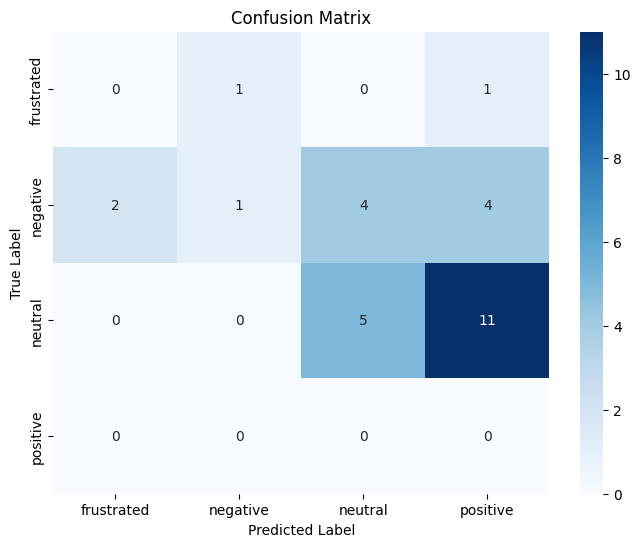

In [ ]:
# prompt: make 4x4 confusion matrix using df["customer_sentiment"] and res, they have these possible values: 'neutral', 'negative', 'frustrated', 'positive'

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df["customer_sentiment"]' and 'res' are already defined
# and contain the predicted and true sentiment labels, respectively.

# Ensure both series have the same length
min_len = min(len(df["customer_sentiment"]), len(res))
y_true = df["customer_sentiment"][:min_len]
y_pred = res[:min_len]

# Define the possible sentiment labels
labels = ['frustrated',  'negative', 'neutral', 'positive']


# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
# prompt: calcualte f1 score for every 'customer_sentiment', with macro and weighted

from sklearn.metrics import f1_score

# Assuming 'df["customer_sentiment"]' and 'res' are already defined
# and contain the predicted and true sentiment labels, respectively.

# Ensure both series have the same length
min_len = min(len(df["customer_sentiment"]), len(res))
y_true = df["customer_sentiment"][:min_len]
y_pred = res[:min_len]

# Define the possible sentiment labels
labels = ['frustrated',  'negative', 'neutral', 'positive']

# Calculate macro F1-score
macro_f1 = f1_score(y_true, y_pred, average='macro', labels=labels)
print(f"Macro F1-score: {macro_f1}")

# Calculate weighted F1-score
weighted_f1 = f1_score(y_true, y_pred, average='weighted', labels=labels)
print(f"Weighted F1-score: {weighted_f1}\n")

# Calculate F1-score for each sentiment
for sentiment in labels:
  sentiment_indices = [i for i, x in enumerate(y_true) if x==sentiment]
  if len(sentiment_indices) > 0 :
    y_true_sentiment = [y_true[i] for i in sentiment_indices]
    y_pred_sentiment = [y_pred[i] for i in sentiment_indices]
    f1 = f1_score(y_true_sentiment, y_pred_sentiment, average='macro', labels=[sentiment])
    print(f"F1-score for {sentiment}: {f1}")

Macro F1-score: 0.13571428571428573
Weighted F1-score: 0.2704761904761905

F1-score for frustrated: 0.0
F1-score for negative: 0.15384615384615385
F1-score for neutral: 0.47619047619047616


In [ ]:
try:
    df = pd.read_parquet('train-00000-of-00001-a5a7c6e4bb30b016.parquet')
    print("Parquet file loaded successfully.")
    # print(df.head())  # Print the head to verify
except Exception as e:
    print(f"Error loading parquet file: {e}")

Parquet file loaded successfully.


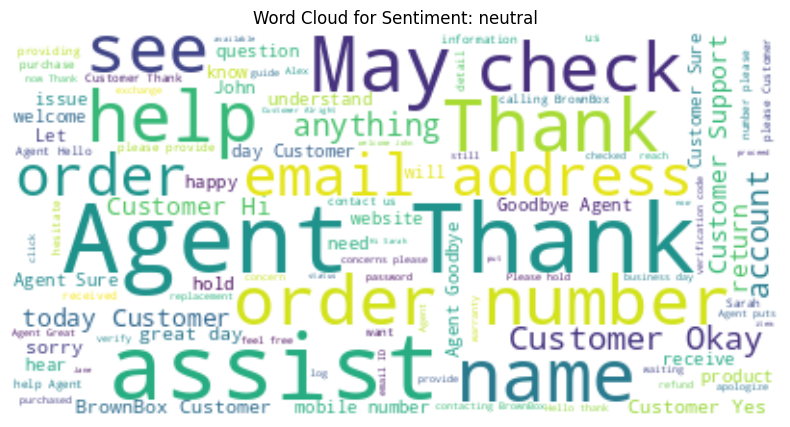

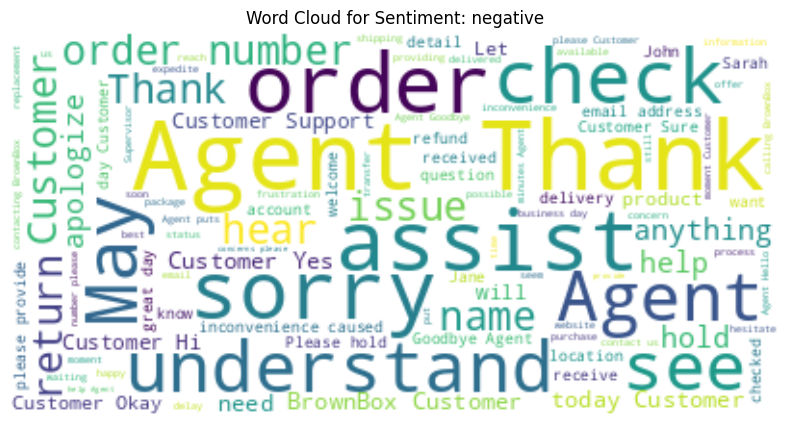

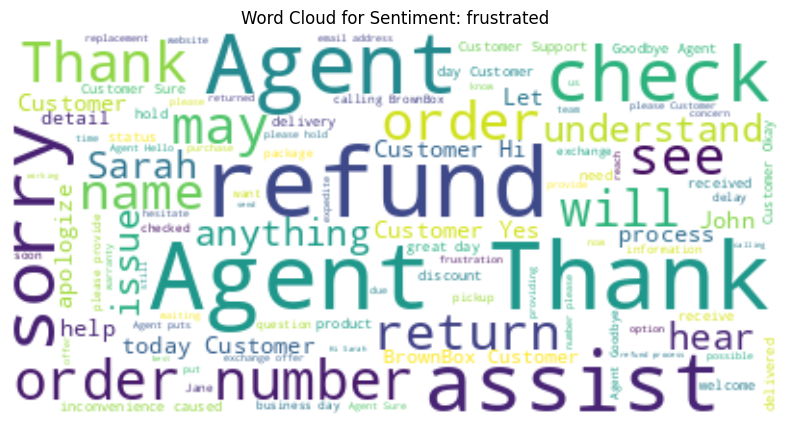

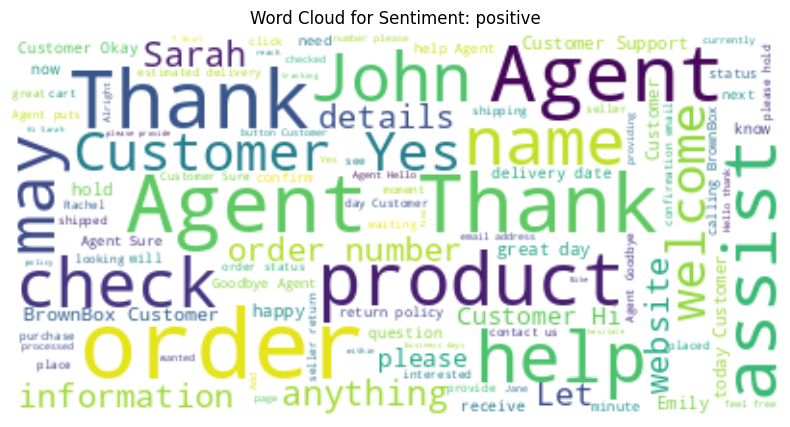

In [ ]:
# prompt: for all the 'customer_sentiment' categories, make word clouds of conversation after removing stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df' is your DataFrame and 'preprocessed_tickets' contains the preprocessed text
# You'll need to adapt the code below to your specific column names and data structure.

for sentiment in df["customer_sentiment"].unique():
    # Filter data for the current sentiment
    sentiment_df = df[df["customer_sentiment"] == sentiment]
    text = " ".join(sentiment_df["conversation"].astype(str))  # Assuming your conversation text is in the 'body' column. Change if needed

    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Sentiment: {sentiment}")
    plt.show()

In [ ]:
fdf = df[df["customer_sentiment"] == "frustrated"]
ngdf = df[df["customer_sentiment"] == "negative"]
ndf = df[df["customer_sentiment"] == "neutral"]
pdf = df[df["customer_sentiment"] == "positive"]

In [ ]:
print(ngdf.sample(n=1)["conversation"].values[0])

Agent: Thank you for calling BrownBox Customer Support. My name is Sarah. How can I assist you today?

Customer: Hi Sarah, my name is John. I need to change the address for the pickup of my Microwave Oven. Can you help me with that?

Agent: Sure, John. I'd be happy to assist you with that. May I know your order number?

Customer: Yes, it's #123456.

Agent: Thank you, John. I see that your order is scheduled for pickup tomorrow. Let me check if we can change the pickup address for you.

Customer: Okay, please do that fast. I need to change it urgently.

Agent: I understand, John. Please hold for a moment while I check with our shipping team.

[After a brief hold]

Agent: John, I've checked with our shipping team, and I'm sorry to inform you that we cannot change the pickup address at this point. The pickup is scheduled for tomorrow, and the address cannot be changed now.

Customer: What?! This is ridiculous. I need to change the address. Can't you do anything?

Agent: I'm sorry, John, b